## p.290 회귀=연속(앞까지 분류=이산)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

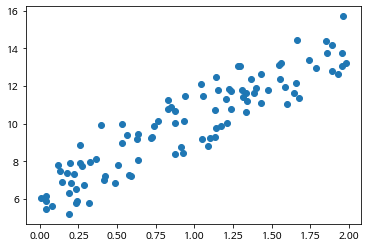

In [23]:
np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)
plt.scatter(X,y)

In [24]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [25]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T)+w0
    diff = y-y_pred
    w0_fectors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_fectors.T,diff))
    return w1_update,w0_update

In [26]:
#경사하강법
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update,w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [27]:
w1,w0 = gradient_descent_steps(X,y,iters=10000)

In [28]:
w1,w0

(array([[3.96846751]]), array([[6.22215108]]))

In [29]:
# y=4X+6

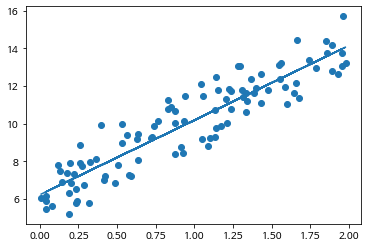

In [30]:
y_pred = w1[0,0]*X + w0
plt.scatter(X,y)
plt.plot(X,y_pred)

In [17]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0]) #원래 배열의 셔플 된 복사본을 반환 
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update,w0_update = get_weight_update(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [18]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)

In [19]:
w1,w0

(array([[4.07225726]]), array([[6.0643819]]))